In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [5]:
validation_split = 0.2
epochs = 10
batch_size = 32
img_height = 180
img_width = 180

`Creating The Training data set with a 20% split`

In [7]:
training_data = keras.utils.image_dataset_from_directory(
    directory='flowers/',
    validation_split= validation_split,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 12592 files for training.


`Creating the validation data set with the 20% split`

In [8]:
validation_data = keras.utils.image_dataset_from_directory(
    directory='flowers/',
    validation_split= validation_split,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


`Printing out the different classes our model should be able to classify`

In [9]:
class_names = training_data.class_names
print(class_names)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


`Taking a look at the 16 classes with a sample picture for each`

2024-08-09 09:18:02.716792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-09 09:18:02.717463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


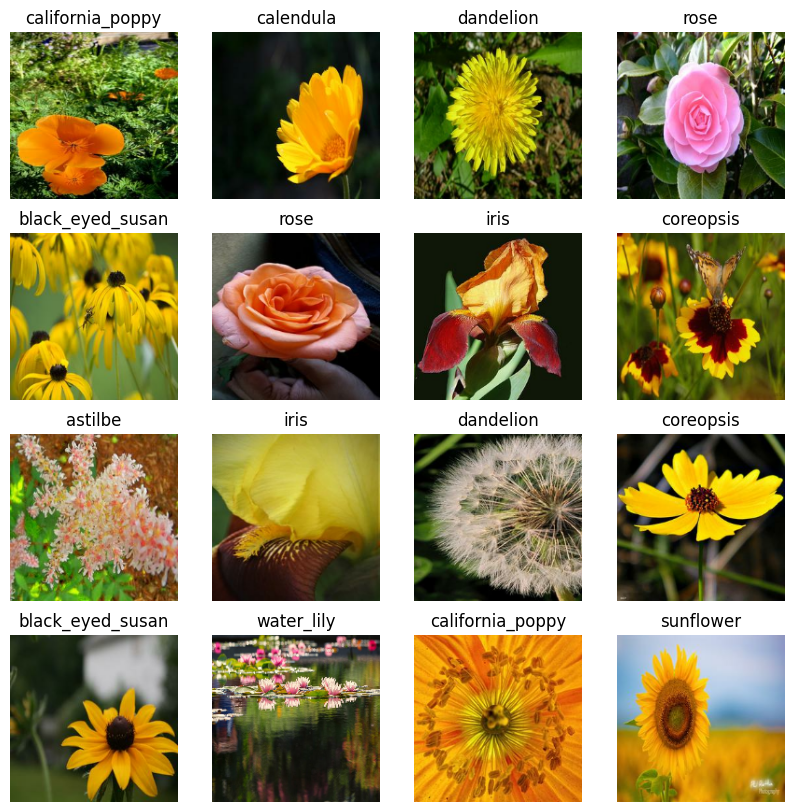

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

`Using Autotune to create a cache for our data sets for faster training`

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

`Creating our first model using Convolution Neural Network (CNN)`

In [16]:
num_classes = len(class_names)

model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

`Fitting our first model to train on the training data set we created earlier with 10 ilterations`

In [17]:
clf_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2024-08-09 09:34:08.337136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]
2024-08-09 09:34:08.337721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


394/394 [==============================] - ETA: 0s - loss: 1.8124 - accuracy: 0.3902

2024-08-09 09:34:40.599981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3148]
	 [[{{node Placeholder/_0}}]]
2024-08-09 09:34:40.600344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3148]
	 [[{{node Placeholder/_0}}]]


394/394 [==============================] - 35s 82ms/step - loss: 1.8124 - accuracy: 0.3902 - val_loss: 1.5240 - val_accuracy: 0.4848
Epoch 2/10
394/394 [==============================] - 32s 82ms/step - loss: 1.2816 - accuracy: 0.5695 - val_loss: 1.3088 - val_accuracy: 0.5588
Epoch 3/10
394/394 [==============================] - 32s 82ms/step - loss: 0.9130 - accuracy: 0.6975 - val_loss: 1.2925 - val_accuracy: 0.5835
Epoch 4/10
394/394 [==============================] - 32s 82ms/step - loss: 0.5823 - accuracy: 0.8051 - val_loss: 1.2983 - val_accuracy: 0.6099
Epoch 5/10
394/394 [==============================] - 32s 81ms/step - loss: 0.3297 - accuracy: 0.8899 - val_loss: 1.5586 - val_accuracy: 0.5982
Epoch 6/10
394/394 [==============================] - 32s 82ms/step - loss: 0.1968 - accuracy: 0.9375 - val_loss: 1.7129 - val_accuracy: 0.6045
Epoch 7/10
394/394 [==============================] - 32s 82ms/step - loss: 0.1204 - accuracy: 0.9617 - val_loss: 2.1082 - val_accuracy: 0.5928
Epo

`Plotted the training and Validation accuracy for our first model`

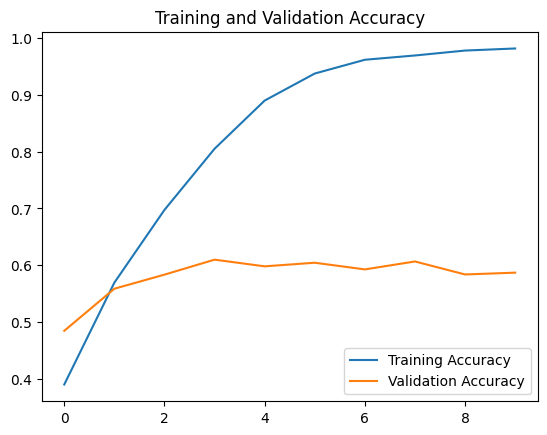

In [27]:
clf1_training = clf_1.history['accuracy']
clf1_validation = clf_1.history['val_accuracy']


plt.plot(range(10), clf1_training, label='Training Accuracy')
plt.plot(range(10), clf1_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


`We wanted to see if we could increase our model accuracy by adding data augmentation layers. We have 7 augmentation layers so we will create 7 with one layer each and another with all 7 augmentation layers`

In [52]:
data_augmentation_random_flip = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
  ]
)

`Taking a look at a sample image after Random Flip augmentation layer`

2024-08-10 08:10:41.288218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 08:10:41.289191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


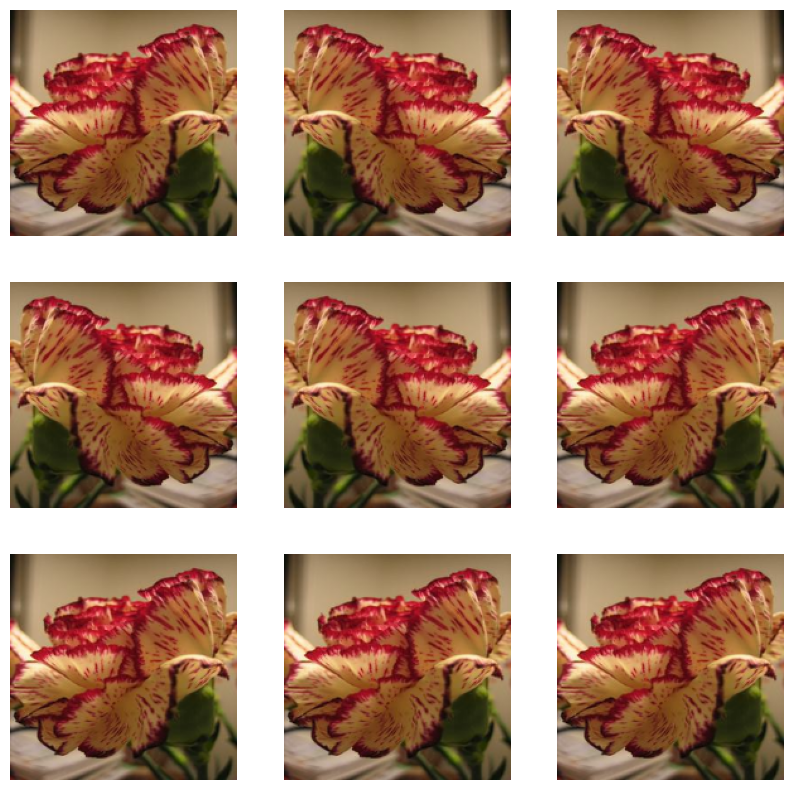

In [54]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation_random_flip(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [96]:
model_2 = Sequential([
  data_augmentation_random_flip,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_25 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [56]:
Random_flip_clf = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


394/394 [==============================] - 35s 87ms/step - loss: 1.7956 - accuracy: 0.3968 - val_loss: 1.5123 - val_accuracy: 0.4987
Epoch 2/10
394/394 [==============================] - 34s 86ms/step - loss: 1.2861 - accuracy: 0.5696 - val_loss: 1.2057 - val_accuracy: 0.5950
Epoch 3/10
394/394 [==============================] - 34s 86ms/step - loss: 1.0106 - accuracy: 0.6607 - val_loss: 1.1187 - val_accuracy: 0.6347
Epoch 4/10
394/394 [==============================] - 34s 86ms/step - loss: 0.7925 - accuracy: 0.7340 - val_loss: 1.0249 - val_accuracy: 0.6636
Epoch 5/10
394/394 [==============================] - 34s 86ms/step - loss: 0.6433 - accuracy: 0.7862 - val_loss: 1.1072 - val_accuracy: 0.6547
Epoch 6/10
394/394 [==============================] - 34s 87ms/step - loss: 0.5053 - accuracy: 0.8329 - val_loss: 1.0754 - val_accuracy: 0.6725
Epoch 7/10
394/394 [==============================] - 34s 87ms/step - loss: 0.4058 - accuracy: 0.8661 - val_loss: 1.1670 - val_accuracy: 0.6585
Epo

`Creating another model using Random Crop augmentation`

In [80]:
data_augmentation_random_crop = keras.Sequential(
  [
    layers.RandomCrop(height=80, width=80, seed=123)
  ]
)

2024-08-10 08:50:47.960775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 08:50:47.962427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


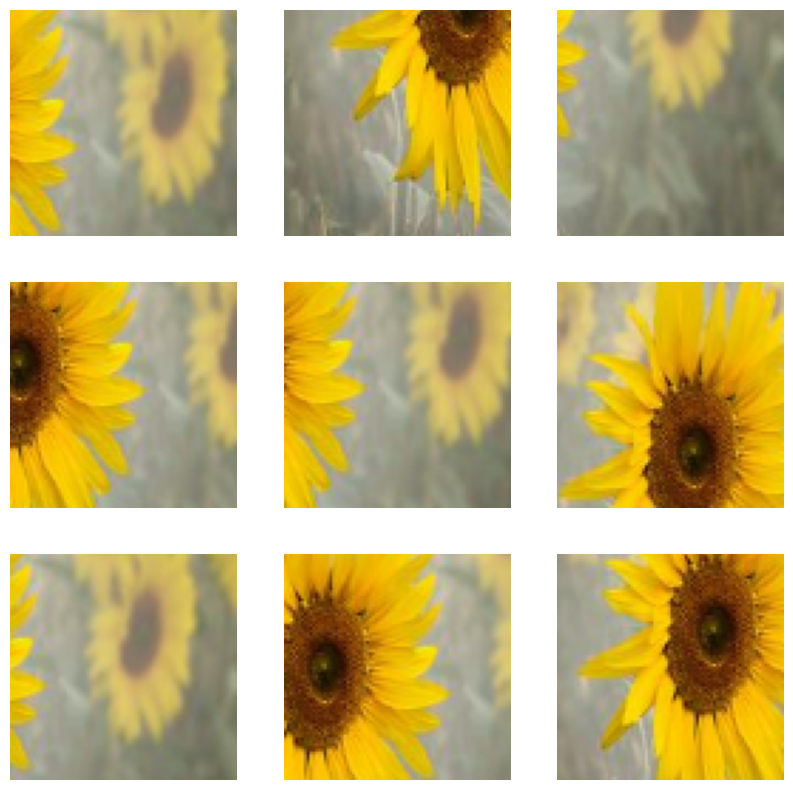

In [81]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation_random_crop(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [124]:
model_3 = Sequential([
  data_augmentation_random_crop,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


In [125]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [126]:
random_crop_clf = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 12s 26ms/step - loss: 2.0257 - accuracy: 0.2888 - val_loss: 1.8172 - val_accuracy: 0.3472
Epoch 2/10
394/394 [==============================] - 10s 25ms/step - loss: 1.7348 - accuracy: 0.3945 - val_loss: 1.7370 - val_accuracy: 0.4012
Epoch 3/10
394/394 [==============================] - 9s 24ms/step - loss: 1.5985 - accuracy: 0.4470 - val_loss: 1.5111 - val_accuracy: 0.4717
Epoch 4/10
394/394 [==============================] - 10s 25ms/step - loss: 1.5130 - accuracy: 0.4766 - val_loss: 1.8771 - val_accuracy: 0.3990
Epoch 5/10
394/394 [==============================] - 10s 25ms/step - loss: 1.4297 - accuracy: 0.5151 - val_loss: 1.4288 - val_accuracy: 0.5073
Epoch 6/10
394/394 [==============================] - 10s 25ms/step - loss: 1.3556 - accuracy: 0.5314 - val_loss: 1.5693 - val_accuracy: 0.4740
Epoch 7/10
394/394 [==============================] - 10s 25ms/step - loss: 1.3011 - accuracy: 0.5566 - val_loss: 1.3971 - val_accuracy: 

`Creating our next model using random translation layer`

2024-08-10 09:32:29.109513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 09:32:29.110283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]


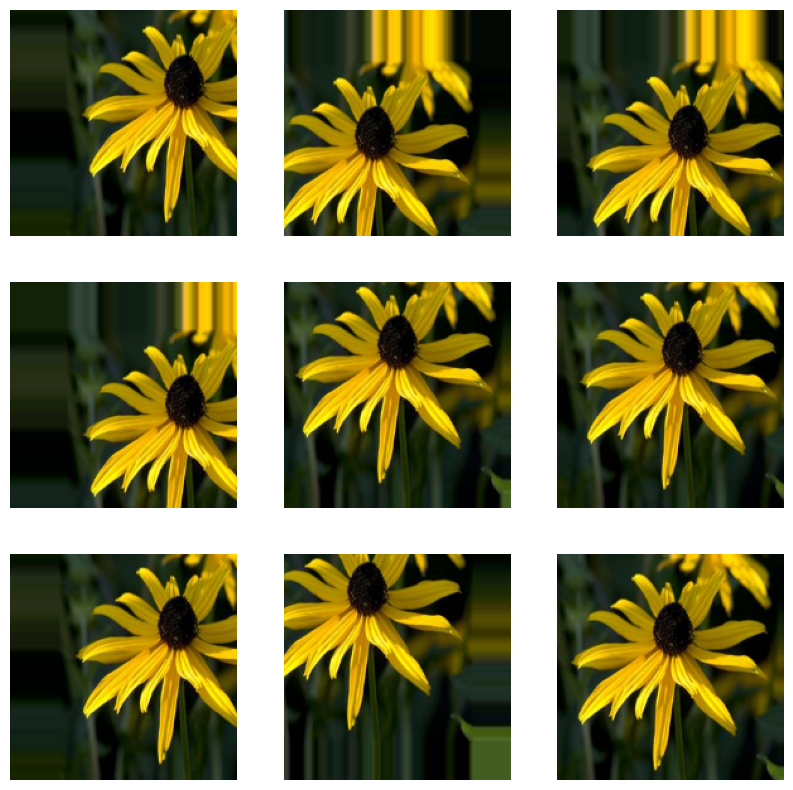

In [127]:
random_translation_data_augmentation = keras.Sequential(
  [
    layers.RandomTranslation(
        height_factor=(-0.2, 0.3),
        width_factor=(-0.2, 0.3),
        fill_mode='nearest',
        interpolation='nearest')
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = random_translation_data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [128]:
model_4 = Sequential([
  random_translation_data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [129]:
random_translation_clf = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 36s 88ms/step - loss: 1.8855 - accuracy: 0.3555 - val_loss: 1.5186 - val_accuracy: 0.4806
Epoch 2/10
394/394 [==============================] - 35s 88ms/step - loss: 1.5056 - accuracy: 0.4841 - val_loss: 1.3853 - val_accuracy: 0.5276
Epoch 3/10
394/394 [==============================] - 34s 87ms/step - loss: 1.3594 - accuracy: 0.5361 - val_loss: 1.2622 - val_accuracy: 0.5870
Epoch 4/10
394/394 [==============================] - 34s 87ms/step - loss: 1.2412 - accuracy: 0.5731 - val_loss: 1.1514 - val_accuracy: 0.6217
Epoch 5/10
394/394 [==============================] - 34s 88ms/step - loss: 1.1496 - accuracy: 0.6055 - val_loss: 1.1031 - val_accuracy: 0.6341
Epoch 6/10
394/394 [==============================] - 34s 87ms/step - loss: 1.0714 - accuracy: 0.6317 - val_loss: 0.9783 - val_accuracy: 0.6766
Epoch 7/10
394/394 [==============================] - 34s 88ms/step - loss: 1.0031 - accuracy: 0.6560 - val_loss: 0.9391 - val_accuracy:

2024-08-10 08:47:20.603920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 08:47:20.604504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]


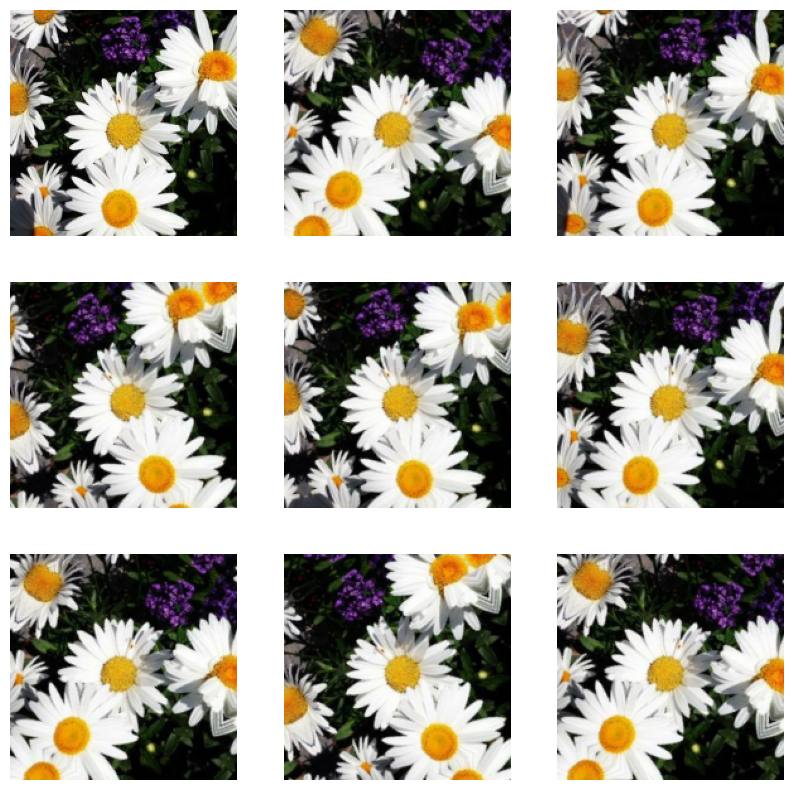

In [74]:
random_rotation_data_augmentation = keras.Sequential(
  [
    layers.RandomRotation(0.1)
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = random_rotation_data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [94]:
model_5 = Sequential([
  random_rotation_data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [130]:
random_rotation_clf = model_5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 36s 89ms/step - loss: 1.9015 - accuracy: 0.3574 - val_loss: 1.4620 - val_accuracy: 0.5184
Epoch 2/10
394/394 [==============================] - 35s 88ms/step - loss: 1.3679 - accuracy: 0.5378 - val_loss: 1.2580 - val_accuracy: 0.5870
Epoch 3/10
394/394 [==============================] - 35s 88ms/step - loss: 1.1824 - accuracy: 0.5995 - val_loss: 1.1084 - val_accuracy: 0.6401
Epoch 4/10
394/394 [==============================] - 35s 88ms/step - loss: 1.0394 - accuracy: 0.6486 - val_loss: 1.1256 - val_accuracy: 0.6331
Epoch 5/10
394/394 [==============================] - 35s 89ms/step - loss: 0.9300 - accuracy: 0.6885 - val_loss: 0.9805 - val_accuracy: 0.6760
Epoch 6/10
394/394 [==============================] - 35s 88ms/step - loss: 0.8314 - accuracy: 0.7203 - val_loss: 1.0431 - val_accuracy: 0.6680
Epoch 7/10
394/394 [==============================] - 35s 89ms/step - loss: 0.7620 - accuracy: 0.7443 - val_loss: 0.9902 - val_accuracy:

2024-08-10 09:09:58.736539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]
2024-08-10 09:09:58.737919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]


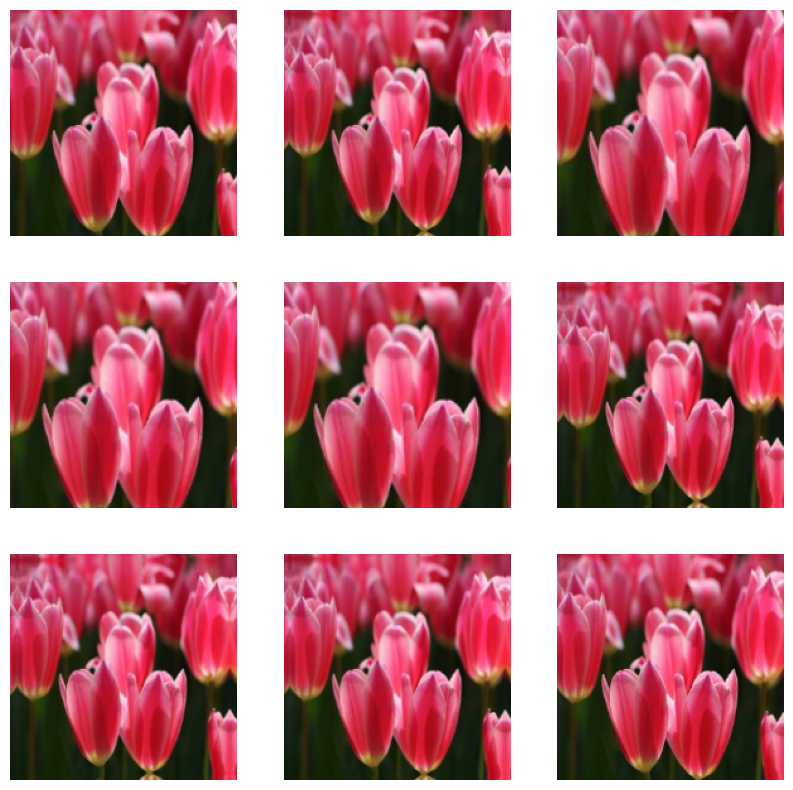

In [104]:
random_zoom_data_augmentation = keras.Sequential(
  [
    layers.RandomZoom(0.2)
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = random_zoom_data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [131]:
model_6 = Sequential([
  random_zoom_data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [132]:
random_zoom_clf = model_6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 36s 89ms/step - loss: 1.7237 - accuracy: 0.4230 - val_loss: 1.4001 - val_accuracy: 0.5280
Epoch 2/10
394/394 [==============================] - 35s 89ms/step - loss: 1.2719 - accuracy: 0.5727 - val_loss: 1.1529 - val_accuracy: 0.6150
Epoch 3/10
394/394 [==============================] - 35s 89ms/step - loss: 1.0251 - accuracy: 0.6589 - val_loss: 1.0921 - val_accuracy: 0.6350
Epoch 4/10
394/394 [==============================] - 35s 88ms/step - loss: 0.8441 - accuracy: 0.7124 - val_loss: 1.0999 - val_accuracy: 0.6375
Epoch 5/10
394/394 [==============================] - 35s 88ms/step - loss: 0.6723 - accuracy: 0.7730 - val_loss: 1.0315 - val_accuracy: 0.6734
Epoch 6/10
394/394 [==============================] - 35s 89ms/step - loss: 0.5642 - accuracy: 0.8115 - val_loss: 1.0430 - val_accuracy: 0.6719
Epoch 7/10
394/394 [==============================] - 35s 89ms/step - loss: 0.4464 - accuracy: 0.8504 - val_loss: 1.0946 - val_accuracy:

2024-08-10 09:12:52.493606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 09:12:52.494292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


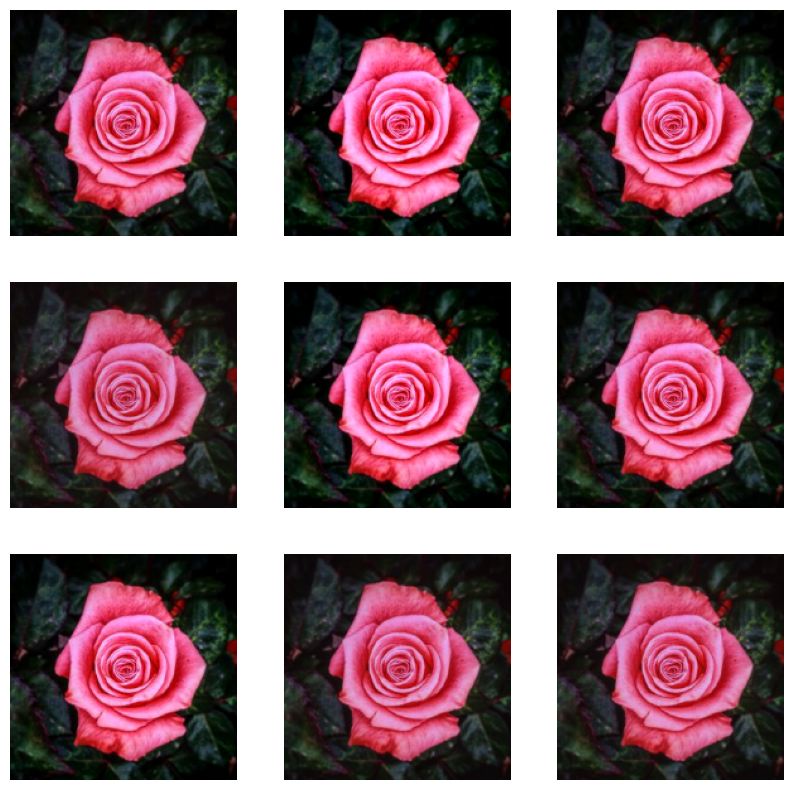

In [108]:
random_contrast_data_augmentation = keras.Sequential(
  [
    layers.RandomContrast(0.2)
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = random_contrast_data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [133]:
model_7 = Sequential([
  random_contrast_data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [134]:
random_contrast_clf = model_7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 37s 90ms/step - loss: 1.8083 - accuracy: 0.3960 - val_loss: 1.4359 - val_accuracy: 0.5305
Epoch 2/10
394/394 [==============================] - 35s 90ms/step - loss: 1.2902 - accuracy: 0.5698 - val_loss: 1.2973 - val_accuracy: 0.5775
Epoch 3/10
394/394 [==============================] - 36s 91ms/step - loss: 0.9200 - accuracy: 0.6883 - val_loss: 1.1998 - val_accuracy: 0.6156
Epoch 4/10
394/394 [==============================] - 36s 91ms/step - loss: 0.5903 - accuracy: 0.8012 - val_loss: 1.3820 - val_accuracy: 0.5943
Epoch 5/10
394/394 [==============================] - 36s 91ms/step - loss: 0.3369 - accuracy: 0.8902 - val_loss: 1.4670 - val_accuracy: 0.6191
Epoch 6/10
394/394 [==============================] - 36s 90ms/step - loss: 0.2190 - accuracy: 0.9304 - val_loss: 1.6277 - val_accuracy: 0.6131
Epoch 7/10
394/394 [==============================] - 35s 90ms/step - loss: 0.1523 - accuracy: 0.9512 - val_loss: 1.7517 - val_accuracy:

2024-08-10 09:17:15.836466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 09:17:15.837242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


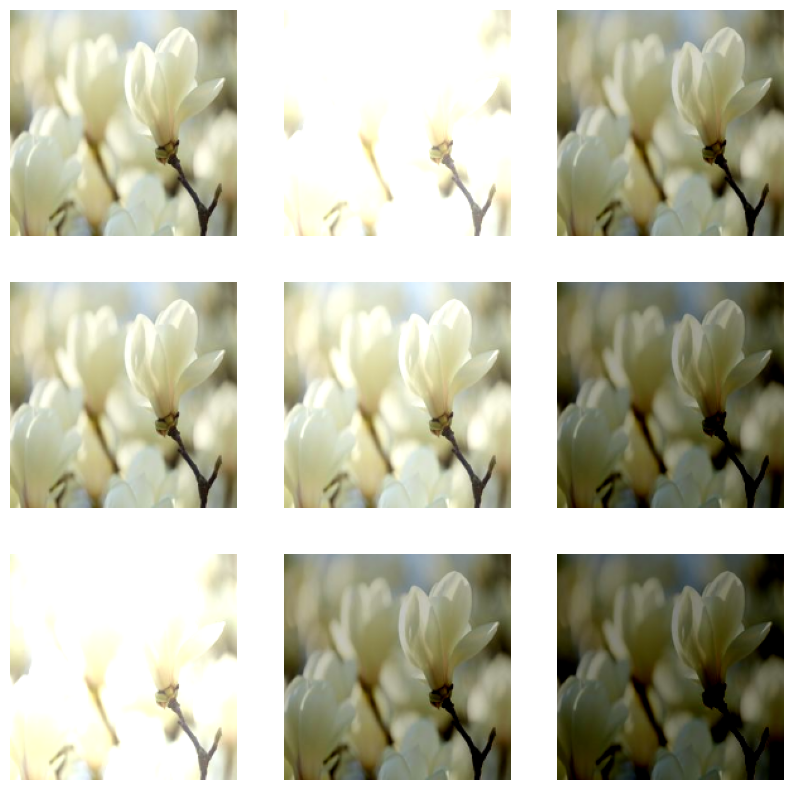

In [114]:
random_brightness_data_augmentation = keras.Sequential(
  [
    layers.RandomBrightness(factor=0.5)
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = random_brightness_data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [136]:
model_8 = Sequential([
  random_brightness_data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_8.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
random_brightness_clf = model_8.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
394/394 [==============================] - 36s 87ms/step - loss: 1.8422 - accuracy: 0.3882 - val_loss: 1.5201 - val_accuracy: 0.4825
Epoch 2/10
394/394 [==============================] - 34s 87ms/step - loss: 1.3454 - accuracy: 0.5513 - val_loss: 1.2965 - val_accuracy: 0.5683
Epoch 3/10
394/394 [==============================] - 34s 87ms/step - loss: 1.0229 - accuracy: 0.6617 - val_loss: 1.2415 - val_accuracy: 0.6102
Epoch 4/10
394/394 [==============================] - 34s 87ms/step - loss: 0.7131 - accuracy: 0.7641 - val_loss: 1.3050 - val_accuracy: 0.6042
Epoch 5/10
394/394 [==============================] - 34s 87ms/step - loss: 0.5065 - accuracy: 0.8339 - val_loss: 1.3655 - val_accuracy: 0.6306
Epoch 6/10
394/394 [==============================] - 34s 87ms/step - loss: 0.3385 - accuracy: 0.8885 - val_loss: 1.6627 - val_accuracy: 0.6337
Epoch 7/10
394/394 [==============================] - 34s 87ms/step - loss: 0.2468 - accuracy: 0.9157 - val_loss: 1.7511 - val_accuracy:

2024-08-10 09:25:16.125885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-10 09:25:16.126993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]


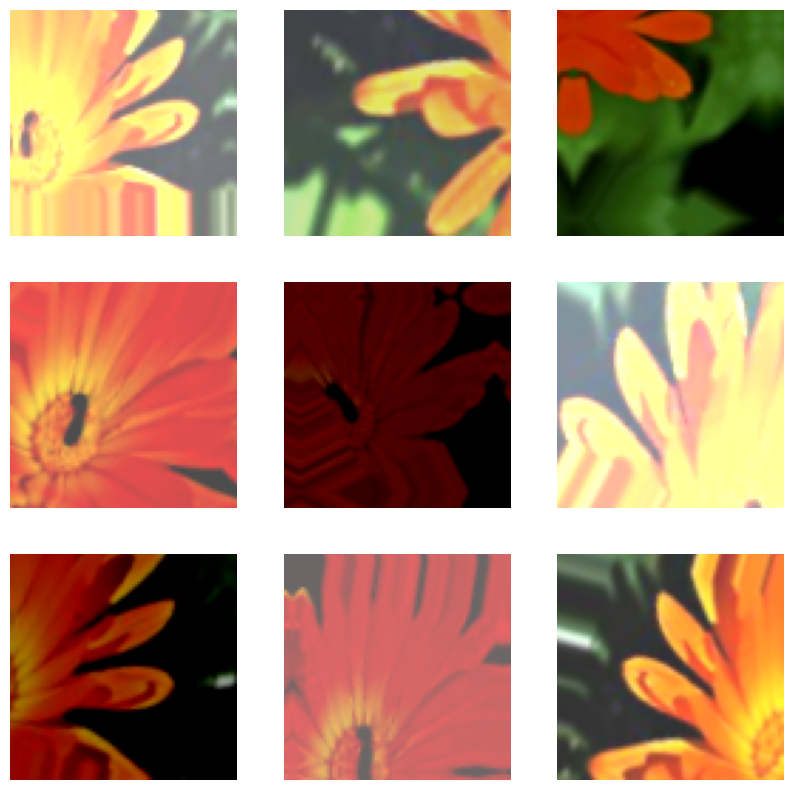

In [119]:
data_augmentation = keras.Sequential(
  [
    layers.RandomBrightness(factor=0.5),
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomCrop(height=80, width=80, seed=123),
    layers.RandomTranslation(
        height_factor=(-0.2, 0.3),
        width_factor=(-0.2, 0.3),
        fill_mode='nearest',
        interpolation='nearest'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(factor=0.5)

  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [138]:
model_9 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [140]:
all_layers_clf = model_9.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


394/394 [==============================] - 18s 42ms/step - loss: 2.3714 - accuracy: 0.1869 - val_loss: 2.0335 - val_accuracy: 0.2786
Epoch 2/10
394/394 [==============================] - 16s 42ms/step - loss: 2.1425 - accuracy: 0.2585 - val_loss: 2.0788 - val_accuracy: 0.3186
Epoch 3/10
394/394 [==============================] - 16s 42ms/step - loss: 2.0648 - accuracy: 0.2884 - val_loss: 1.8672 - val_accuracy: 0.3431
Epoch 4/10
394/394 [==============================] - 16s 42ms/step - loss: 2.0291 - accuracy: 0.3024 - val_loss: 1.9485 - val_accuracy: 0.3625
Epoch 5/10
394/394 [==============================] - 16s 42ms/step - loss: 1.9648 - accuracy: 0.3217 - val_loss: 1.6957 - val_accuracy: 0.4149
Epoch 6/10
394/394 [==============================] - 16s 42ms/step - loss: 1.9345 - accuracy: 0.3310 - val_loss: 1.7274 - val_accuracy: 0.4123
Epoch 7/10
394/394 [==============================] - 16s 42ms/step - loss: 1.9170 - accuracy: 0.3407 - val_loss: 1.6118 - val_accuracy: 0.4390
Epo

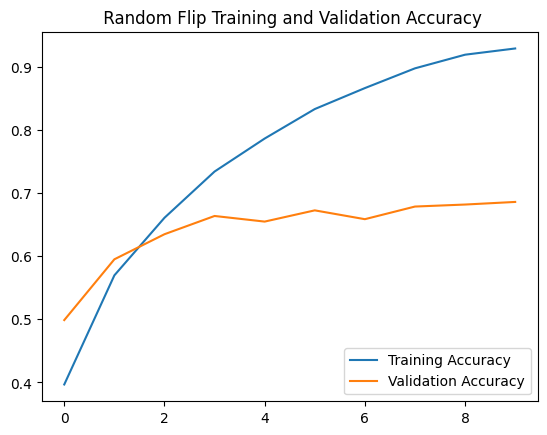

In [135]:
random_flip_training = Random_flip_clf.history['accuracy']
random_flip_validation = Random_flip_clf.history['val_accuracy']

plt.plot(range(10), random_flip_training, label='Training Accuracy')
plt.plot(range(10), random_flip_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Flip Training and Validation Accuracy')
plt.show()

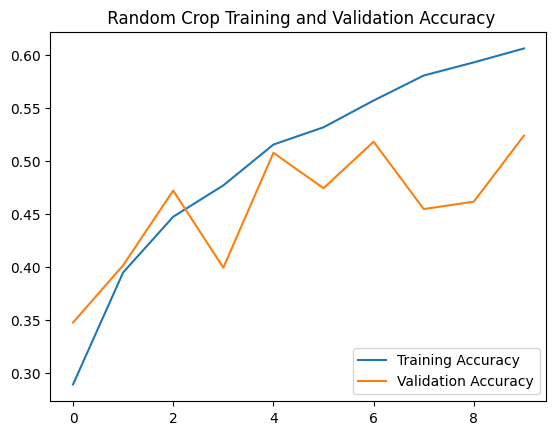

In [141]:
random_crop_training = random_crop_clf.history['accuracy']
random_crop_validation = random_crop_clf.history['val_accuracy']

plt.plot(range(10), random_crop_training, label='Training Accuracy')
plt.plot(range(10), random_crop_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Crop Training and Validation Accuracy')
plt.show()

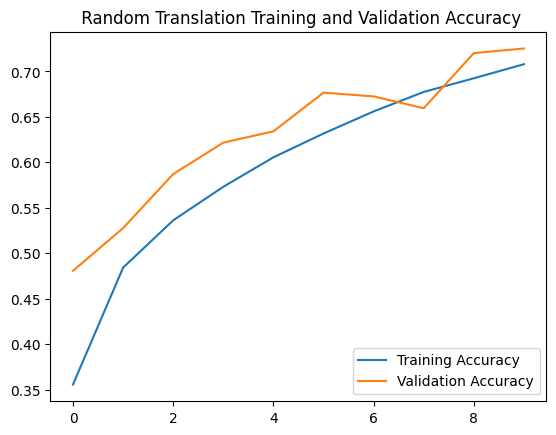

In [142]:
random_translation_training = random_translation_clf.history['accuracy']
random_translation_validation = random_translation_clf.history['val_accuracy']

plt.plot(range(10), random_translation_training, label='Training Accuracy')
plt.plot(range(10), random_translation_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Translation Training and Validation Accuracy')
plt.show()

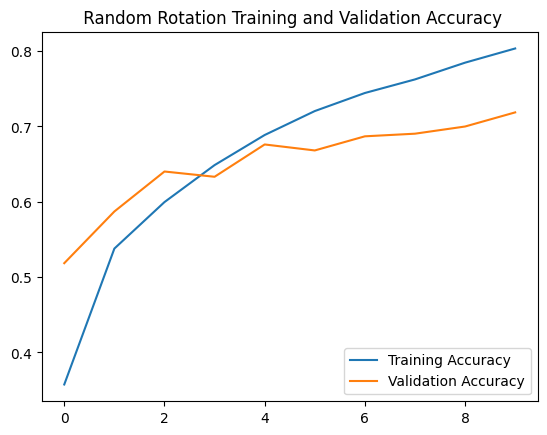

In [143]:
random_rotation_training = random_rotation_clf.history['accuracy']
random_rotation_validation = random_rotation_clf.history['val_accuracy']

plt.plot(range(10), random_rotation_training, label='Training Accuracy')
plt.plot(range(10), random_rotation_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Rotation Training and Validation Accuracy')
plt.show()

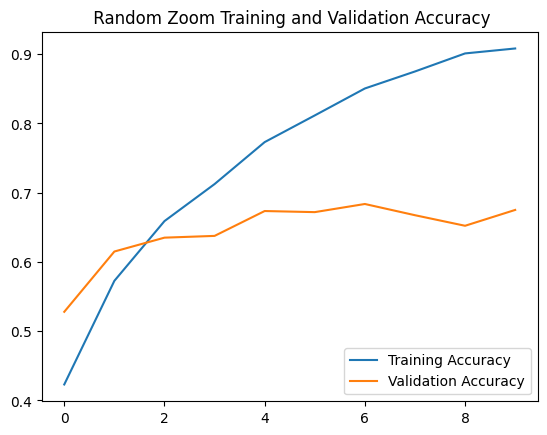

In [144]:
random_zoom_training = random_zoom_clf.history['accuracy']
random_zoom_validation = random_zoom_clf.history['val_accuracy']

plt.plot(range(10), random_zoom_training, label='Training Accuracy')
plt.plot(range(10), random_zoom_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Zoom Training and Validation Accuracy')
plt.show()

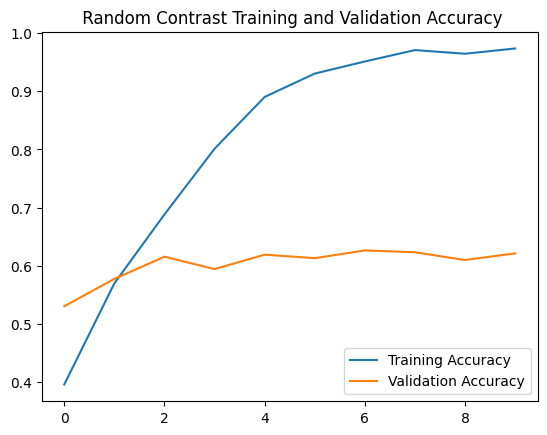

In [145]:
random_contrast_training = random_contrast_clf.history['accuracy']
random_contrast_validation = random_contrast_clf.history['val_accuracy']

plt.plot(range(10), random_contrast_training, label='Training Accuracy')
plt.plot(range(10), random_contrast_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Contrast Training and Validation Accuracy')
plt.show()

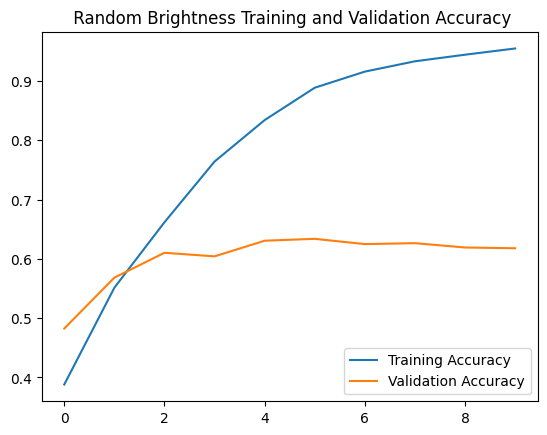

In [146]:
random_brightness_training = random_brightness_clf.history['accuracy']
random_brightness_validation = random_brightness_clf.history['val_accuracy']

plt.plot(range(10), random_brightness_training, label='Training Accuracy')
plt.plot(range(10), random_brightness_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' Random Brightness Training and Validation Accuracy')
plt.show()

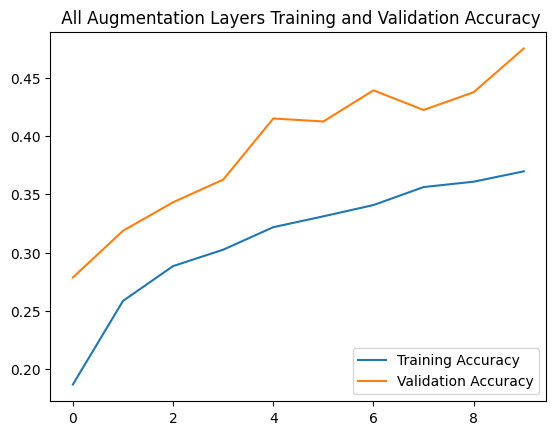

In [147]:
all_augmentation_training = all_layers_clf.history['accuracy']
all_augmentation_validation = all_layers_clf.history['val_accuracy']

plt.plot(range(10), all_augmentation_training, label='Training Accuracy')
plt.plot(range(10), all_augmentation_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' All Augmentation Layers Training and Validation Accuracy')
plt.show()

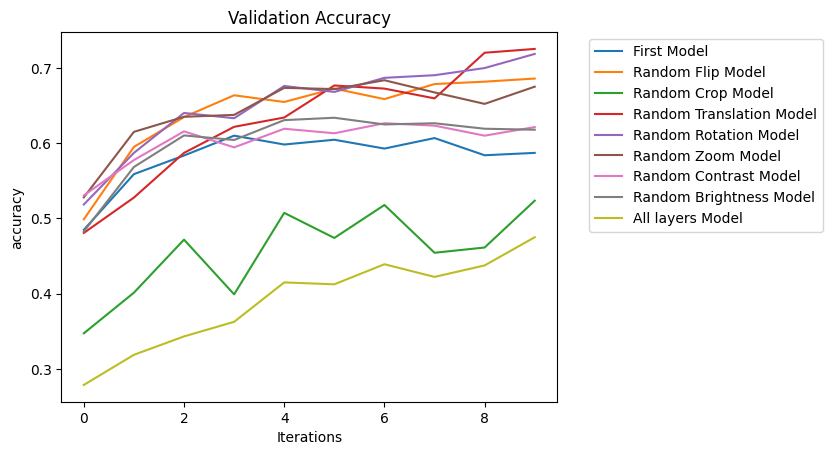

In [155]:
plt.plot(range(10), clf1_validation, label='First Model')
plt.plot(range(10), random_flip_validation, label='Random Flip Model')
plt.plot(range(10), random_crop_validation, label='Random Crop Model')
plt.plot(range(10), random_translation_validation, label='Random Translation Model')
plt.plot(range(10), random_rotation_validation, label='Random Rotation Model')
plt.plot(range(10), random_zoom_validation, label='Random Zoom Model')
plt.plot(range(10), random_contrast_validation, label='Random Contrast Model')
plt.plot(range(10), random_brightness_validation, label='Random Brightness Model')
plt.plot(range(10), all_augmentation_validation, label='All layers Model')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()

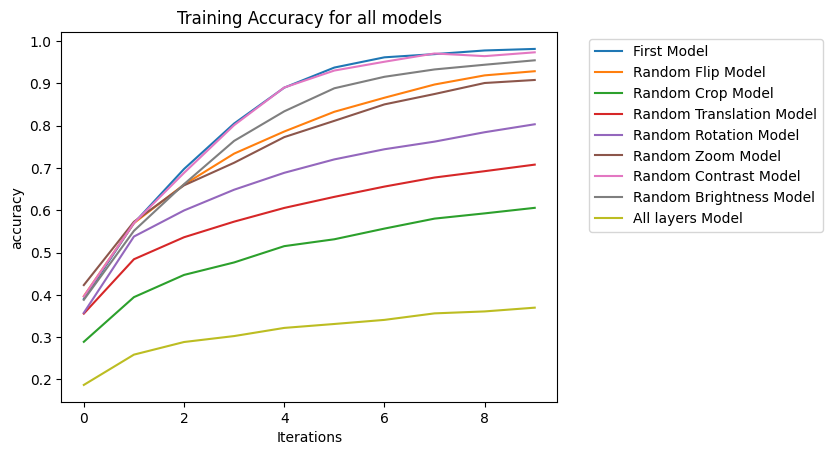

In [157]:
plt.plot(range(10), clf1_training, label='First Model')
plt.plot(range(10), random_flip_training, label='Random Flip Model')
plt.plot(range(10), random_crop_training, label='Random Crop Model')
plt.plot(range(10), random_translation_training, label='Random Translation Model')
plt.plot(range(10), random_rotation_training, label='Random Rotation Model')
plt.plot(range(10), random_zoom_training, label='Random Zoom Model')
plt.plot(range(10), random_contrast_training, label='Random Contrast Model')
plt.plot(range(10), random_brightness_training, label='Random Brightness Model')
plt.plot(range(10), all_augmentation_training, label='All layers Model')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Training Accuracy for all models')
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()

In [158]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 161ms/step
This image most likely belongs to coreopsis with a 26.74 percent confidence.
